<h1 align="center"> The Sparks Fundation </h1>
<h2 align="center"> Task 6 </h2>
<h2 align="center"> Decision Tree </h2>

### Importing the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import f1_score
from sklearn import datasets
%matplotlib inline

### Loading the Dataset

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
y = iris.target
X = iris.data
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Applying Decision Tree Algortihm
We use the kfold module to divide the dataset into n (5) parts and then choosing one part at a time to be test set, and checking how the algorithm performs on it. We use the KFold method from the sklearn library to do this and then checking teh average score on the whole dataset.

In [3]:
clf = DecisionTreeClassifier(random_state=10)
folds = KFold(n_splits = 5, shuffle = True, random_state = 1)
c = 1
scores = []
for i,j in folds.split(X):
    print(c)
    clf.fit(X[i],y[i])
    print("Score on test =",clf.score(X[j],y[j]))
    scores.append(clf.score(X,y))
    print("Score on whole =",scores[c-1],'\n')
    c = c + 1
print("Average Score = %0.2f"%(sum(scores)*100/5),"%")

1
Score on test = 0.9666666666666667
Score on whole = 0.9933333333333333 

2
Score on test = 0.9666666666666667
Score on whole = 0.9933333333333333 

3
Score on test = 0.9666666666666667
Score on whole = 0.9933333333333333 

4
Score on test = 0.9333333333333333
Score on whole = 0.9866666666666667 

5
Score on test = 0.8666666666666667
Score on whole = 0.9733333333333334 

Average Score = 98.80 %


Here we can see the parameters of the decision tree algorithm used 

In [4]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 10,
 'splitter': 'best'}

### Visualizing what the decision tree has chosen as classifying condition
We can do this using the tree module of the sklearn library alongside matplotlib to show it in the notebook

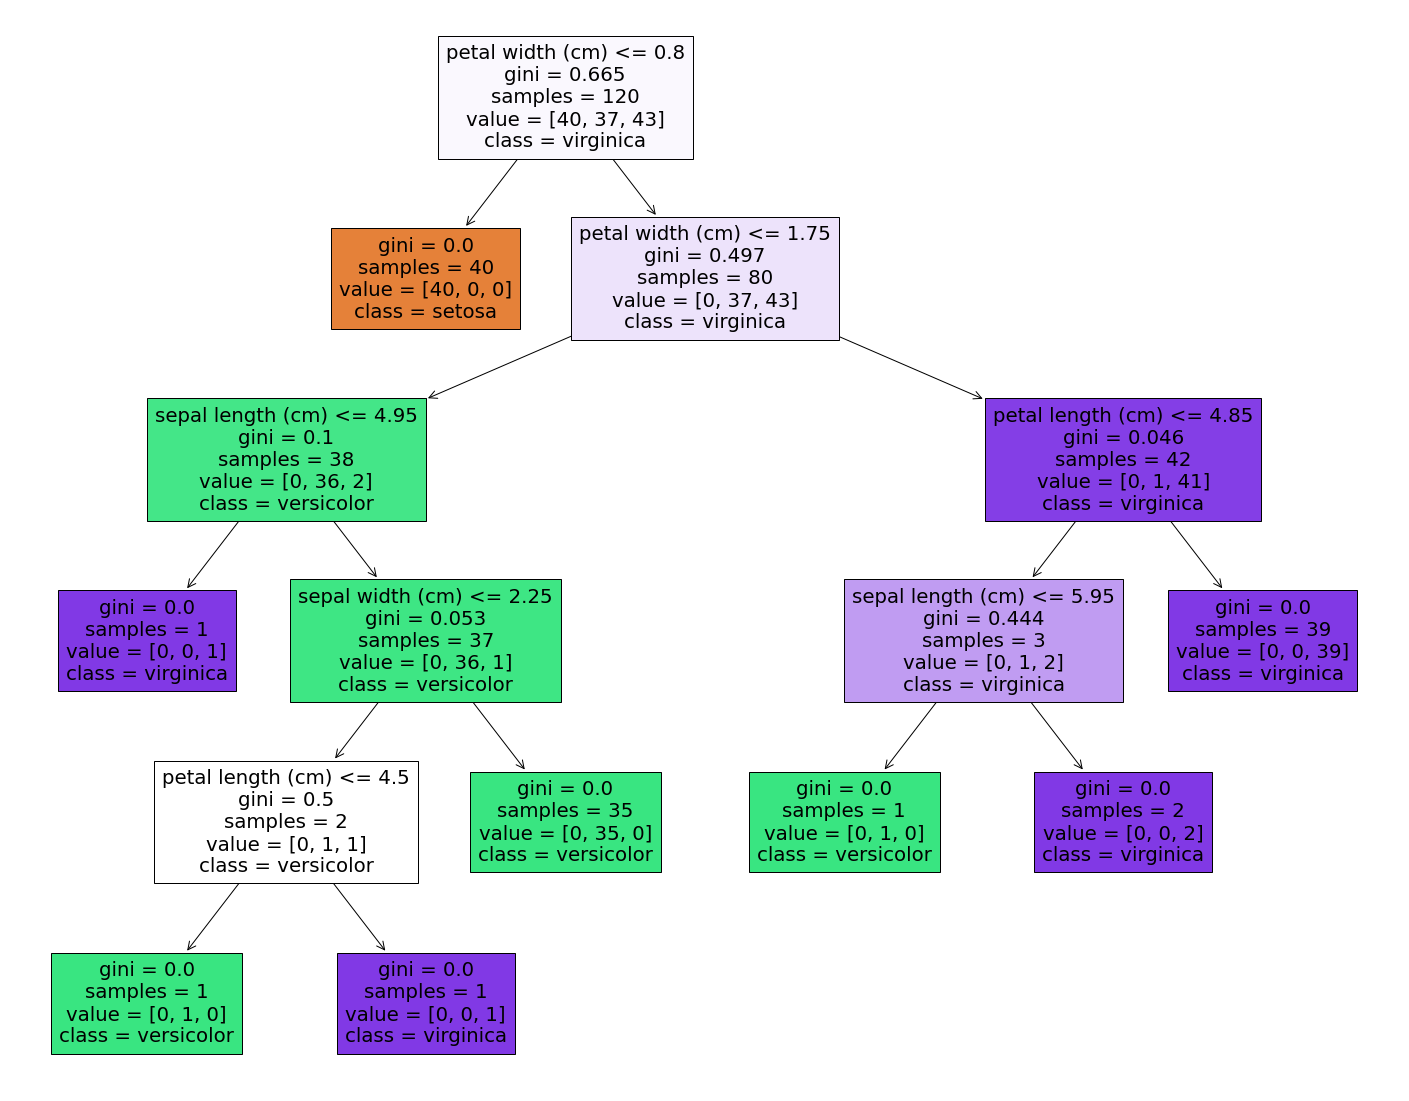

In [5]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, 
            feature_names=iris.feature_names,  
            class_names=iris.target_names,
            filled=True)
plt.show()

In the above representation we can see how the decision tree classifier works and what parameters it looks at each step of the way to decide a class